<h2><b><font color="green">Task II</font></b></h2>
<h1><i><b><font color="purple">Ride Loss Calculation</font></b></i></h1>

Importing the necessary Python libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

I have downloaded the Google Sheets data as a CSV file, and now I am going to upload it here in Jupyter Notebook using the Pandas library:

In [2]:
data = pd.read_csv(r'C:\Users\ECC\Hiring Tasks\SnappBox! Pricing Data Analyst Hiring Task - Ride Loss Calculation.csv')
data['Date'].fillna(method='ffill', inplace=True)
data

,Date,Hour,Requester,Request,Ride,Offered-Order / Created-Order %,Accepted-Order / Offered-Order%,Fullfillment Rate%,Average Ride Fare
0,6/6/2022,19,4738,5826,3982,99%,83%,68%,"250,652"
1,6/6/2022,20,4176,5155,3361,99%,80%,65%,"234,125"
2,6/6/2022,21,3128,3860,2493,99%,79%,65%,"242,016"
3,6/6/2022,22,1829,2272,1418,98%,78%,62%,"243,427"
4,6/6/2022,23,897,1125,597,98%,70%,53%,"236,650"
5,6/7/2022,19,4679,5676,3944,99%,84%,69%,"251,826"
6,6/7/2022,20,4169,5152,3359,99%,80%,65%,"233,678"
7,6/7/2022,21,3322,4189,2632,99%,78%,63%,"235,927"
8,6/7/2022,22,2072,2664,1518,99%,73%,57%,"235,840"
9,6/7/2022,23,841,1043,531,96%,69%,51%,"237,552"


Let's clean the `'Offered-Order / Created-Order %'`, `'Accepted-Order / Offered-Order%'`, and `'Fulfillment Rate%'` columns to be more practical:

In [3]:
data[' Offered-Order / Created-Order %'] = data[' Offered-Order / Created-Order %'].apply(lambda r:float(r.rstrip('%')))/100
data['Accepted-Order / Offered-Order%'] = data['Accepted-Order / Offered-Order%'].apply(lambda r:float(r.rstrip('%')))/100
data['Fullfillment Rate%'] = data['Fullfillment Rate%'].apply(lambda r:float(r.rstrip('%')))/100

data.rename(
    columns={
        ' Offered-Order / Created-Order %':'offered_rate',
        'Accepted-Order / Offered-Order%':'acceptance_rate',
        'Fullfillment Rate%':'fullfillment_rate'
    }, inplace=True
)

In [4]:
data.head()

,Date,Hour,Requester,Request,Ride,offered_rate,acceptance_rate,fullfillment_rate,Average Ride Fare
0,6/6/2022,19,4738,5826,3982,0.99,0.83,0.68,"250,652"
1,6/6/2022,20,4176,5155,3361,0.99,0.80,0.65,"234,125"
2,6/6/2022,21,3128,3860,2493,0.99,0.79,0.65,"242,016"
3,6/6/2022,22,1829,2272,1418,0.98,0.78,0.62,"243,427"
4,6/6/2022,23,897,1125,597,0.98,0.70,0.53,"236,650"


Let's begin by crafting visual aids that illustrate the changes in acceptance rate and fulfillment rate across various timeframes throughout the day, encompassing all three available dates (June 6th, 7th, and 8th). This exploration will shed light on potential patterns and variations:

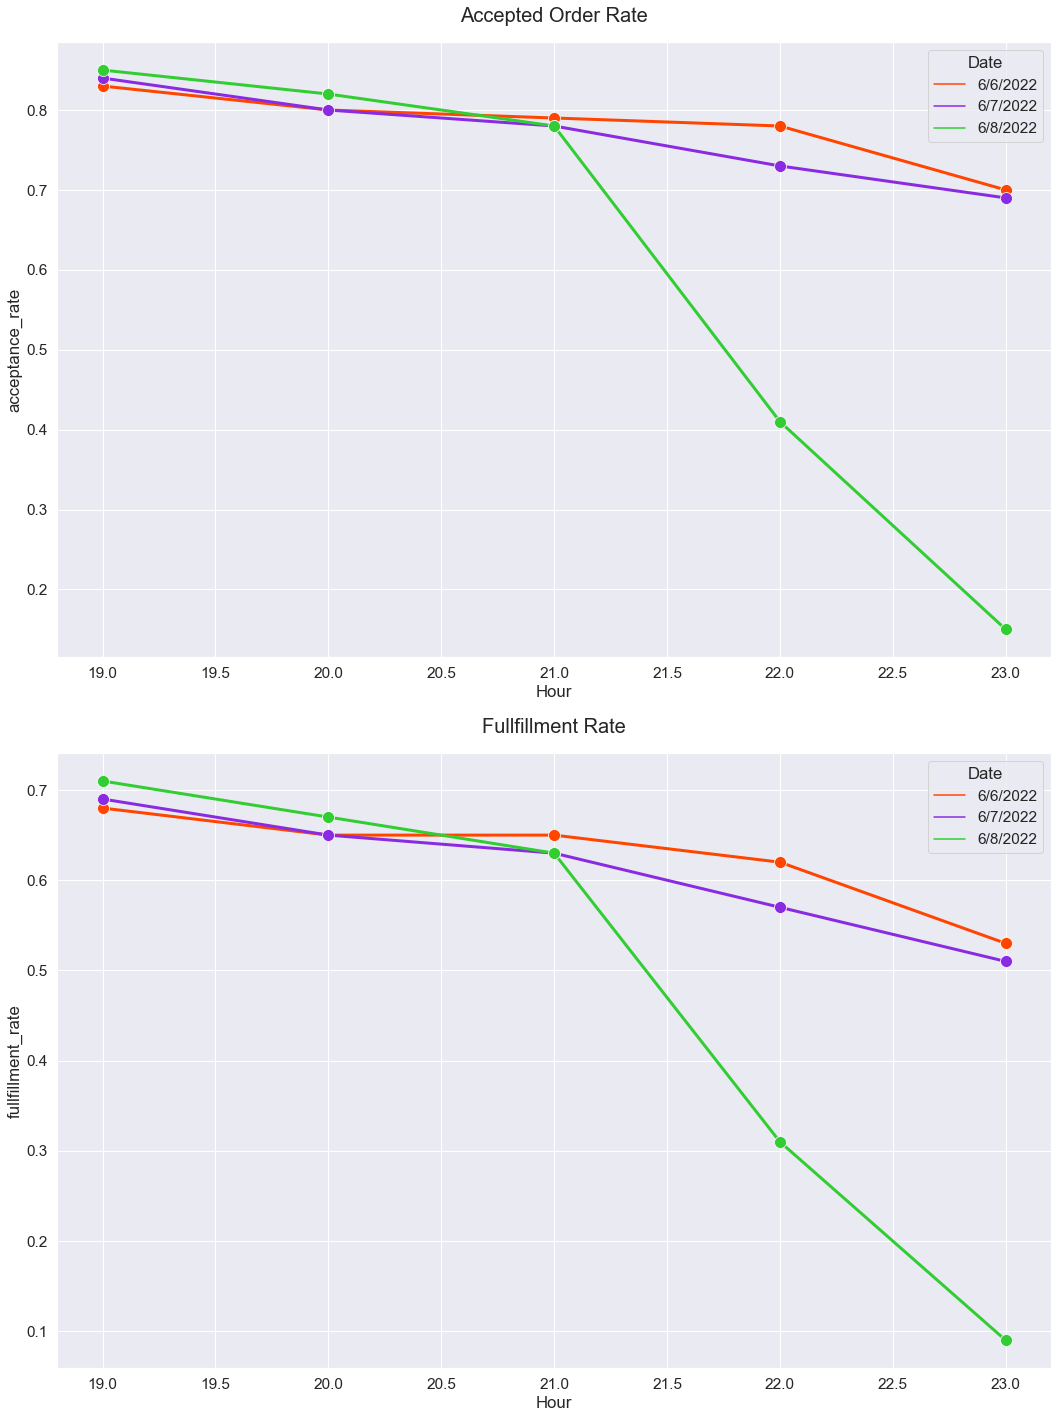

In [6]:
fig, ax = plt.subplots( 2, 1, figsize=(15,20) )
sns.set(font_scale = 1.4)

sns.lineplot(
    x='Hour', y='acceptance_rate', data=data, ax=ax[0], hue=data.Date, marker='o',
    markersize=12, linewidth=3, palette=['orangered', 'blueviolet', 'limegreen']
)

sns.lineplot(
    x='Hour', y='fullfillment_rate', data=data, ax=ax[1], hue=data.Date, marker='o',
    markersize=12, linewidth=3, palette=['orangered', 'blueviolet', 'limegreen']
)

ax[0].set_title("Accepted Order Rate", fontsize=20, pad=20)
ax[1].set_title("Fullfillment Rate", fontsize=20, pad=20)

plt.tight_layout()
plt.show()

In order to <u><b>determine the count of Rides that were lost due to the technical issues</b></u> on <b>June 8th past 10 p.m.</b>, it is necessary <b>to compare <font color="red">the actual completed Ride count</font> against <font color="green">the expected number</font></b>, derived from the historical pattern for the corresponding time period.

Let's break down the steps to calculate this:

<h3><font color="purple">Step 1:</font></h3>

* Calculate <b><font color="darkblue">the average acceptance rate</font></b> for <u><i>the same hours on regular days</i></u> (June 6th and June 7th) <b><font color="green">to estimate the expected number of accepted orders on June 8th after 10 p.m.</font></b> But due to the obvious differences in this ratio between different hours of the day, as can be seen in the <b>'Accepted Order Rate'</b> line plot above, we <b>calculate the average acceptance rate for each hour after 10 p.m. (22 and 23) separately.</b>

<h3><font color="purple">Step 2:</font></h3>

* Calculate <b><font color="darkblue">the average fulfillment rate</font></b> for <u><i>the same hours on regular days</i></u> <b><font color="green">to estimate the expected number of completed rides on June 8th after 10 p.m.</font></b> Again due to the obvious differences in this ratio between different hours of the day, as can be seen in the 'Fullfillment Rate' line plot above, we <b>calculate the average fullfillment rate for each hour after 10 p.m. (22 and 23) separately.</b>

<h3><font color="purple">Step 3:</font></h3>

Subtract <b><font color="green">the expected completed Rides</font></b> from <b><font color="red">the actual completed Rides</font></b> on June 8th after 10 p.m. to get <b><span style="background-color: yellow">the number of Rides Lost</span></b>.

In [7]:
# filtering data for technical problem time period ( June 8th after 10 p.m. )

tech_issue_data = data[(data['Date'] == '6/8/2022') & (data['Hour'] >= 22)]
tech_issue_data.set_index('Hour', inplace=True)
tech_issue_data

,Date,Requester,Request,Ride,offered_rate,acceptance_rate,fullfillment_rate,Average Ride Fare
Hour,,,,,,,,
22,6/8/2022,2123,2974,926,0.99,0.41,0.31,"242,414"
23,6/8/2022,1158,1850,164,0.98,0.15,0.09,"304,116"


In [8]:
# STEP 1 : Calculating the average acceptance rate for the same hours on regular days (separately)

avg_acceptance_rate =\
data[(data.Date.isin(['6/6/2022', '6/7/2022'])) & (data.Hour >= 22)][['Hour','acceptance_rate']]\
.groupby('Hour')[['acceptance_rate']].mean()

avg_acceptance_rate.rename(columns={'acceptance_rate':'avg_acceptance_rate'}, inplace=True)

avg_acceptance_rate

,avg_acceptance_rate
Hour,
22,0.755
23,0.695


In [9]:
# STEP 2 : Calculating the average fulfillment rate for the same hours on regular days (separately)

avg_fulfillment_rate =\
data[(data.Date.isin(['6/6/2022', '6/7/2022'])) & (data.Hour >= 22)][['Hour','fullfillment_rate']]\
.groupby('Hour')[['fullfillment_rate']].mean()

avg_fulfillment_rate.rename(columns={'fullfillment_rate':'avg_fulfillment_rate'}, inplace=True)

avg_fulfillment_rate

,avg_fulfillment_rate
Hour,
22,0.595
23,0.520


In [10]:
# STEP 3-a : Calculating the expected number of accepted orders for the same hours on regular days (separately)

expected_accepted_orders = tech_issue_data.loc[:,'Request'] * avg_acceptance_rate['avg_acceptance_rate']
expected_accepted_orders.to_frame(name='Expected Accepted Orders')

,Expected Accepted Orders
Hour,
22,2245.37
23,1285.75


In [11]:
# STEP 3-b : Calculating the expected number of completed rides for the same hours on regular days (separately)

expected_completed_rides = expected_accepted_orders * avg_fulfillment_rate['avg_fulfillment_rate']
expected_completed_rides.to_frame(name='Expected Completed Rides')

,Expected Completed Rides
Hour,
22,1335.99515
23,668.59000


In [12]:
# STEP 3-c : Calculating the sum of completed rides on regular days after 10 p.m.

expected_completed_rides = expected_completed_rides.sum()
print('the Expected number of completed Rides after 10 p.m. on June 8th is: %.6f'%expected_completed_rides)

the Expected number of completed Rides after 10 p.m. on June 8th is: 2004.585150


In [13]:
# STEP 3-d : Calculating the actual completed rides

actual_completed_rides = tech_issue_data['Ride'].sum()
print('the number of Actual completed Rides after 10 p.m. on June 8th is: %i'%actual_completed_rides)

the number of Actual completed Rides after 10 p.m. on June 8th is: 1090


In [14]:
# STEP 3-d : Calculating the number of Rides Loss

Rides_Loss = expected_completed_rides - actual_completed_rides
print('the number of Rides lost due to technical issues after 10 p.m. on June 8th is: %.6f'%Rides_Loss)

the number of Rides lost due to technical issues after 10 p.m. on June 8th is: 914.585150


by this logic, it becomes evident that the technical disruption encountered on June 8th at 10 p.m. resulted in an estimated <b><span style="background-color: yellow">loss of approximately 915 rides</span></b> for the company. Here, I find it necessary to mention that with a larger amount of data on the <b>'Accepted-Order / Offered-Order%'</b> and <b>'Fulfillment Rate%'</b> of regular days, we could use some more complex and state-of-the-art methods to estimate the expected completed rides. For example, due to the time-dependent nature of the data and the different Accepted-Order and Fulfillment ratios during different hours of the day, the application of time series techniques holds promise for furnishing notably refined estimations